# Explore out-of-sample forecasting  

source: https://github.com/noteven2degrees/timeseries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [42]:
# figure parameters
rcParams['figure.figsize'] = 12, 6

# read data
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
# data = pd.read_csv('./data/AirPassengers.csv', parse_dates='Month', index_col='Month',date_parser=dateparse)
data = pd.read_csv('./data/AirPassengers.csv', index_col='Month')
data.index = pd.to_datetime(data.index)
ts = data['Passengers']
# ts.reset_index(drop=True, inplace=True)
# ts

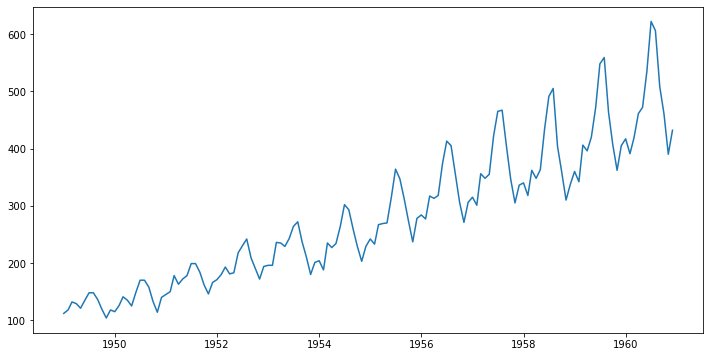

In [43]:
plt.plot(ts)

In [44]:
# decompose time series (optional)
decomposition = seasonal_decompose(ts, two_sided=False)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
residual.dropna(inplace=True)

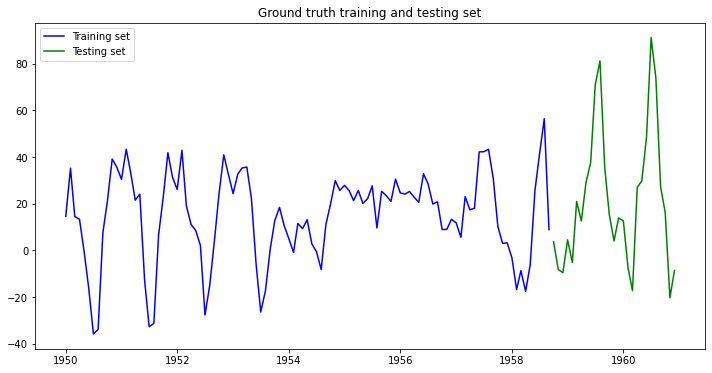

In [45]:
# create training and test set
size = int(len(residual) * 0.8)
train, test = residual[0:size], residual[size:len(residual)]
plt.plot(train.index, train, color='blue', label='Training set')
plt.plot(test.index, test, color='green', label='Testing set')
plt.legend()
plt.title('Ground truth training and testing set')
plt.show()

In [46]:
# assess quality of ARIMA models
# for iterative one-step forecasting on test data set
def compare_ARIMA_modes_testing(order):
    history = [x for x in train]
    predictions_f = list()
    predictions_p = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=-1)
        yhat_f = model_fit.forecast()[0][0]
        yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
        predictions_f.append(yhat_f)
        predictions_p.append(yhat_p)
        history.append(test[t])
    error_f = mean_squared_error(test, predictions_f)
    error_p = mean_squared_error(test, predictions_p)
    print('MSE forecast:\t\t\t{:1.4f}'.format(error_f))
    print('MSE predict:\t\t\t{:1.4f}'.format(error_p))
    return {'Predictions forecast': predictions_f,
            'Predictions predict': predictions_p,
            'MSE forecast': error_f,
            'MSE predict': error_p}

In [47]:
ar_testing = compare_ARIMA_modes_testing((1, 0, 0))
ma_testing = compare_ARIMA_modes_testing((0, 1, 0))
ig_testing = compare_ARIMA_modes_testing((0, 0, 1))
arma_testing = compare_ARIMA_modes_testing((1, 1, 0))
igma_testing = compare_ARIMA_modes_testing((0, 1, 1))
arig_testing = compare_ARIMA_modes_testing((1, 0, 1))
arima_testing = compare_ARIMA_modes_testing((1, 1, 1))

MSE forecast:			468.5450
MSE predict:			468.5450
MSE forecast:			529.5507
MSE predict:			1326.5889
MSE forecast:			507.1724
MSE predict:			507.1724
MSE forecast:			524.6992
MSE predict:			1234.5120
MSE forecast:			525.0780
MSE predict:			1254.6766
MSE forecast:			435.2371
MSE predict:			435.2371
MSE forecast:			542.5222
MSE predict:			1301.9604


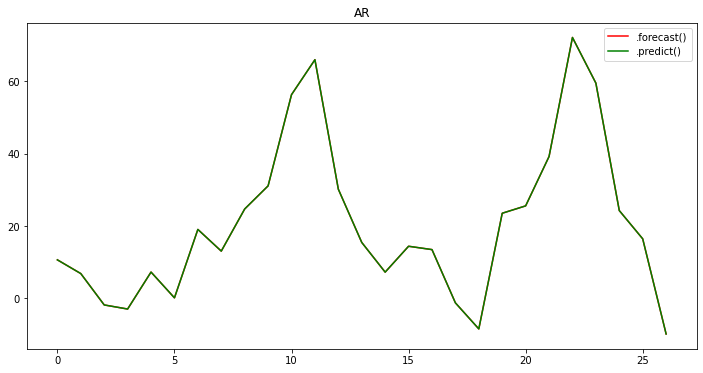

In [51]:
# forecast and predict are identical for AR
# plt.plot(test, label='Ground Truth')
plt.plot(ar_testing['Predictions forecast'], color='red', label='.forecast()')
plt.plot(ar_testing['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('AR')
plt.show()

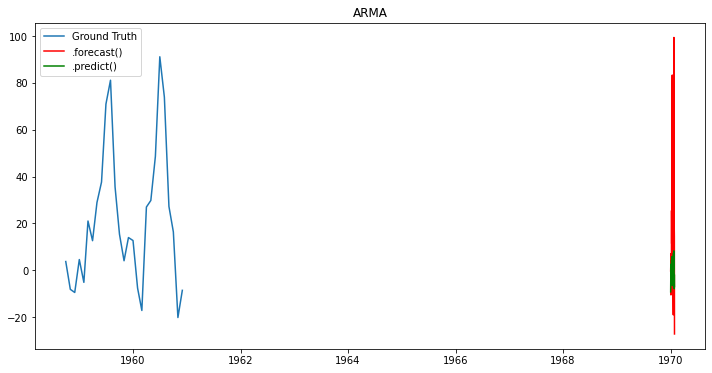

In [27]:
# forecast and predict are different for MA
plt.plot(test, label='Ground Truth')
plt.plot(arma_testing['Predictions forecast'], color='red', label='.forecast()')
plt.plot(arma_testing['Predictions predict'], color='green', label='.predict()')
plt.legend()
plt.title('ARMA')
plt.show()